In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import sklearn as sk
import plotly.express as px
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set()

from pandas.plotting import scatter_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder

In [3]:
dataset = pd.read_csv('CVD_cleaned.csv')

In [4]:
dataset.shape

(308854, 19)

In [5]:
dataset['Heart_Disease'].unique()

array(['No', 'Yes'], dtype=object)

In [4]:
dataset.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [6]:
dataset.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [7]:
# Checking if there is missing value
dataset.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [8]:
dataset.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [9]:
# Check for duplicate columns
duplicate_columns = dataset.columns[dataset.columns.duplicated()]

if duplicate_columns.any():
    print("Duplicate columns found:")
    print(duplicate_columns)
else:
    print("No duplicate columns found.")


No duplicate columns found.


In [10]:
# Step 1: Mapping categorical labels to numerical values
dataset['Heart_Disease'] = dataset['Heart_Disease'].map({'No': 0, 'Yes': 1})

In [11]:
# Step 2: Converting data type to numeric
dataset['Heart_Disease'] = dataset['Heart_Disease'].astype(int)

In [12]:
# Display the modified DataFrame
print(dataset['Heart_Disease'])

0         0
1         1
2         0
3         1
4         0
         ..
308849    0
308850    0
308851    0
308852    0
308853    0
Name: Heart_Disease, Length: 308854, dtype: int32


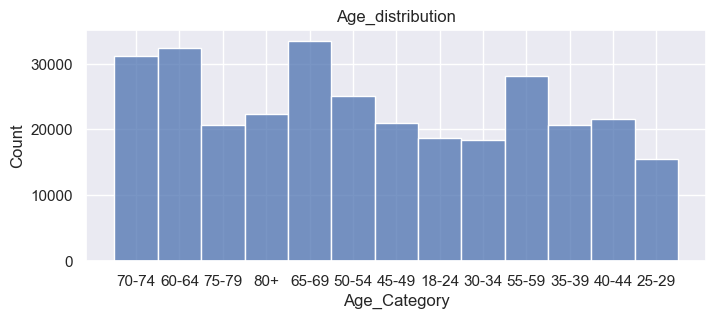

In [13]:
# Data visualization of the CVD_cleaned dataset
plt.figure(figsize=(8, 3))
sns.histplot(dataset.Age_Category)
plt.title('Age_distribution') 
plt.show()

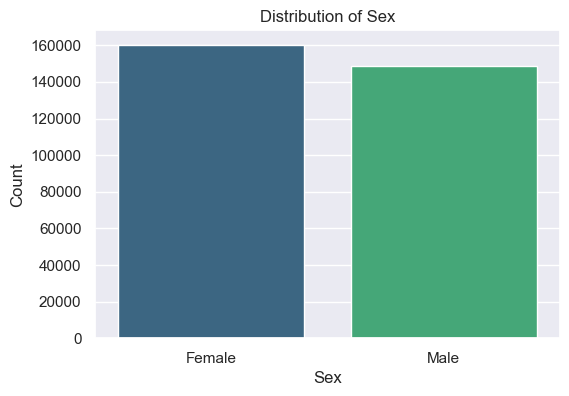

In [14]:
# Create a histogram plot for gender (Sex)
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=dataset, palette='viridis')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Percentage of Gender')

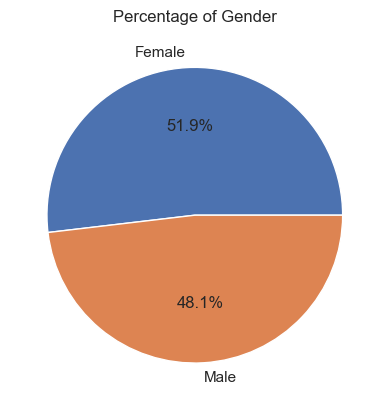

In [15]:
plt.pie(dataset['Sex'].value_counts(), labels=dataset['Sex'].unique(), autopct='%1.1f%%');plt.title('Percentage of Gender')

In [16]:
# Display value counts for the 'Heart_Disease' column
heart_disease_counts = dataset['Heart_Disease'].value_counts()

print("Heart Disease Value Counts:")
print(heart_disease_counts)

Heart Disease Value Counts:
Heart_Disease
0    283883
1     24971
Name: count, dtype: int64


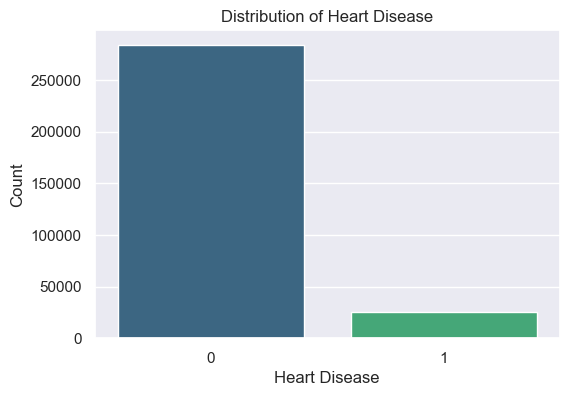

In [17]:
# Create a bar plot for Heart Disease distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart_Disease', data=dataset, palette='viridis')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

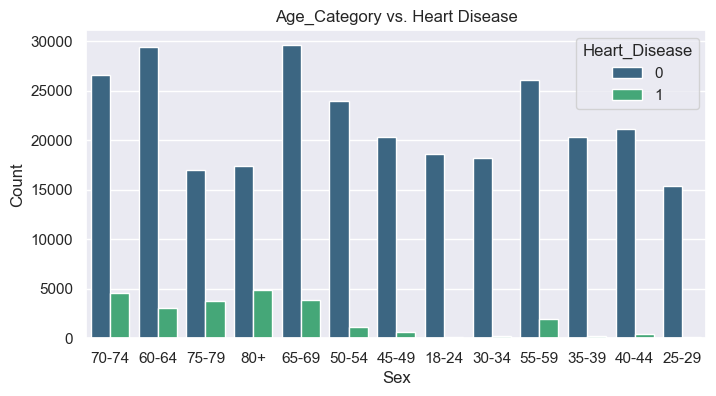

In [18]:
# Create a bar plot for Alcohol Consumption against Heart Disease
plt.figure(figsize=(8, 4))
sns.countplot(x='Age_Category', hue='Heart_Disease', data=dataset, palette='viridis')
plt.title('Age_Category vs. Heart Disease')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

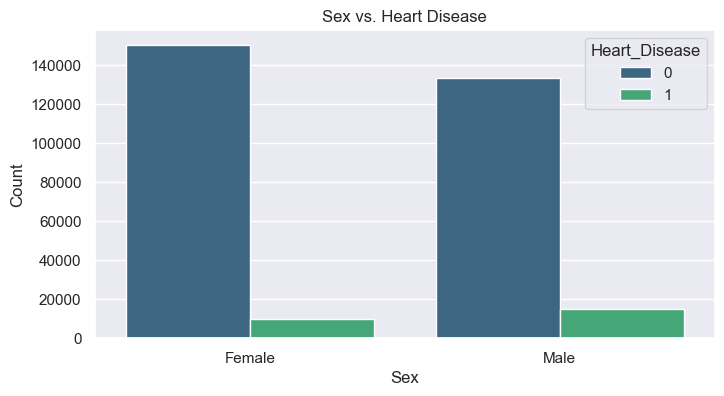

In [19]:
# Create a bar plot for Alcohol Consumption against Heart Disease
plt.figure(figsize=(8, 4))
sns.countplot(x='Sex', hue='Heart_Disease', data=dataset, palette='viridis')
plt.title('Sex vs. Heart Disease')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Percentage of General_Health')

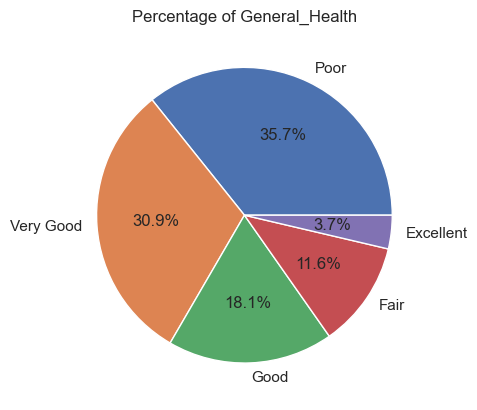

In [20]:
plt.pie(dataset['General_Health'].value_counts(), labels=dataset['General_Health'].unique(), autopct='%1.1f%%');plt.title('Percentage of General_Health')

In [21]:
# Selecting numerical features for the scatter matrix
numerical_features = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

In [22]:
# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

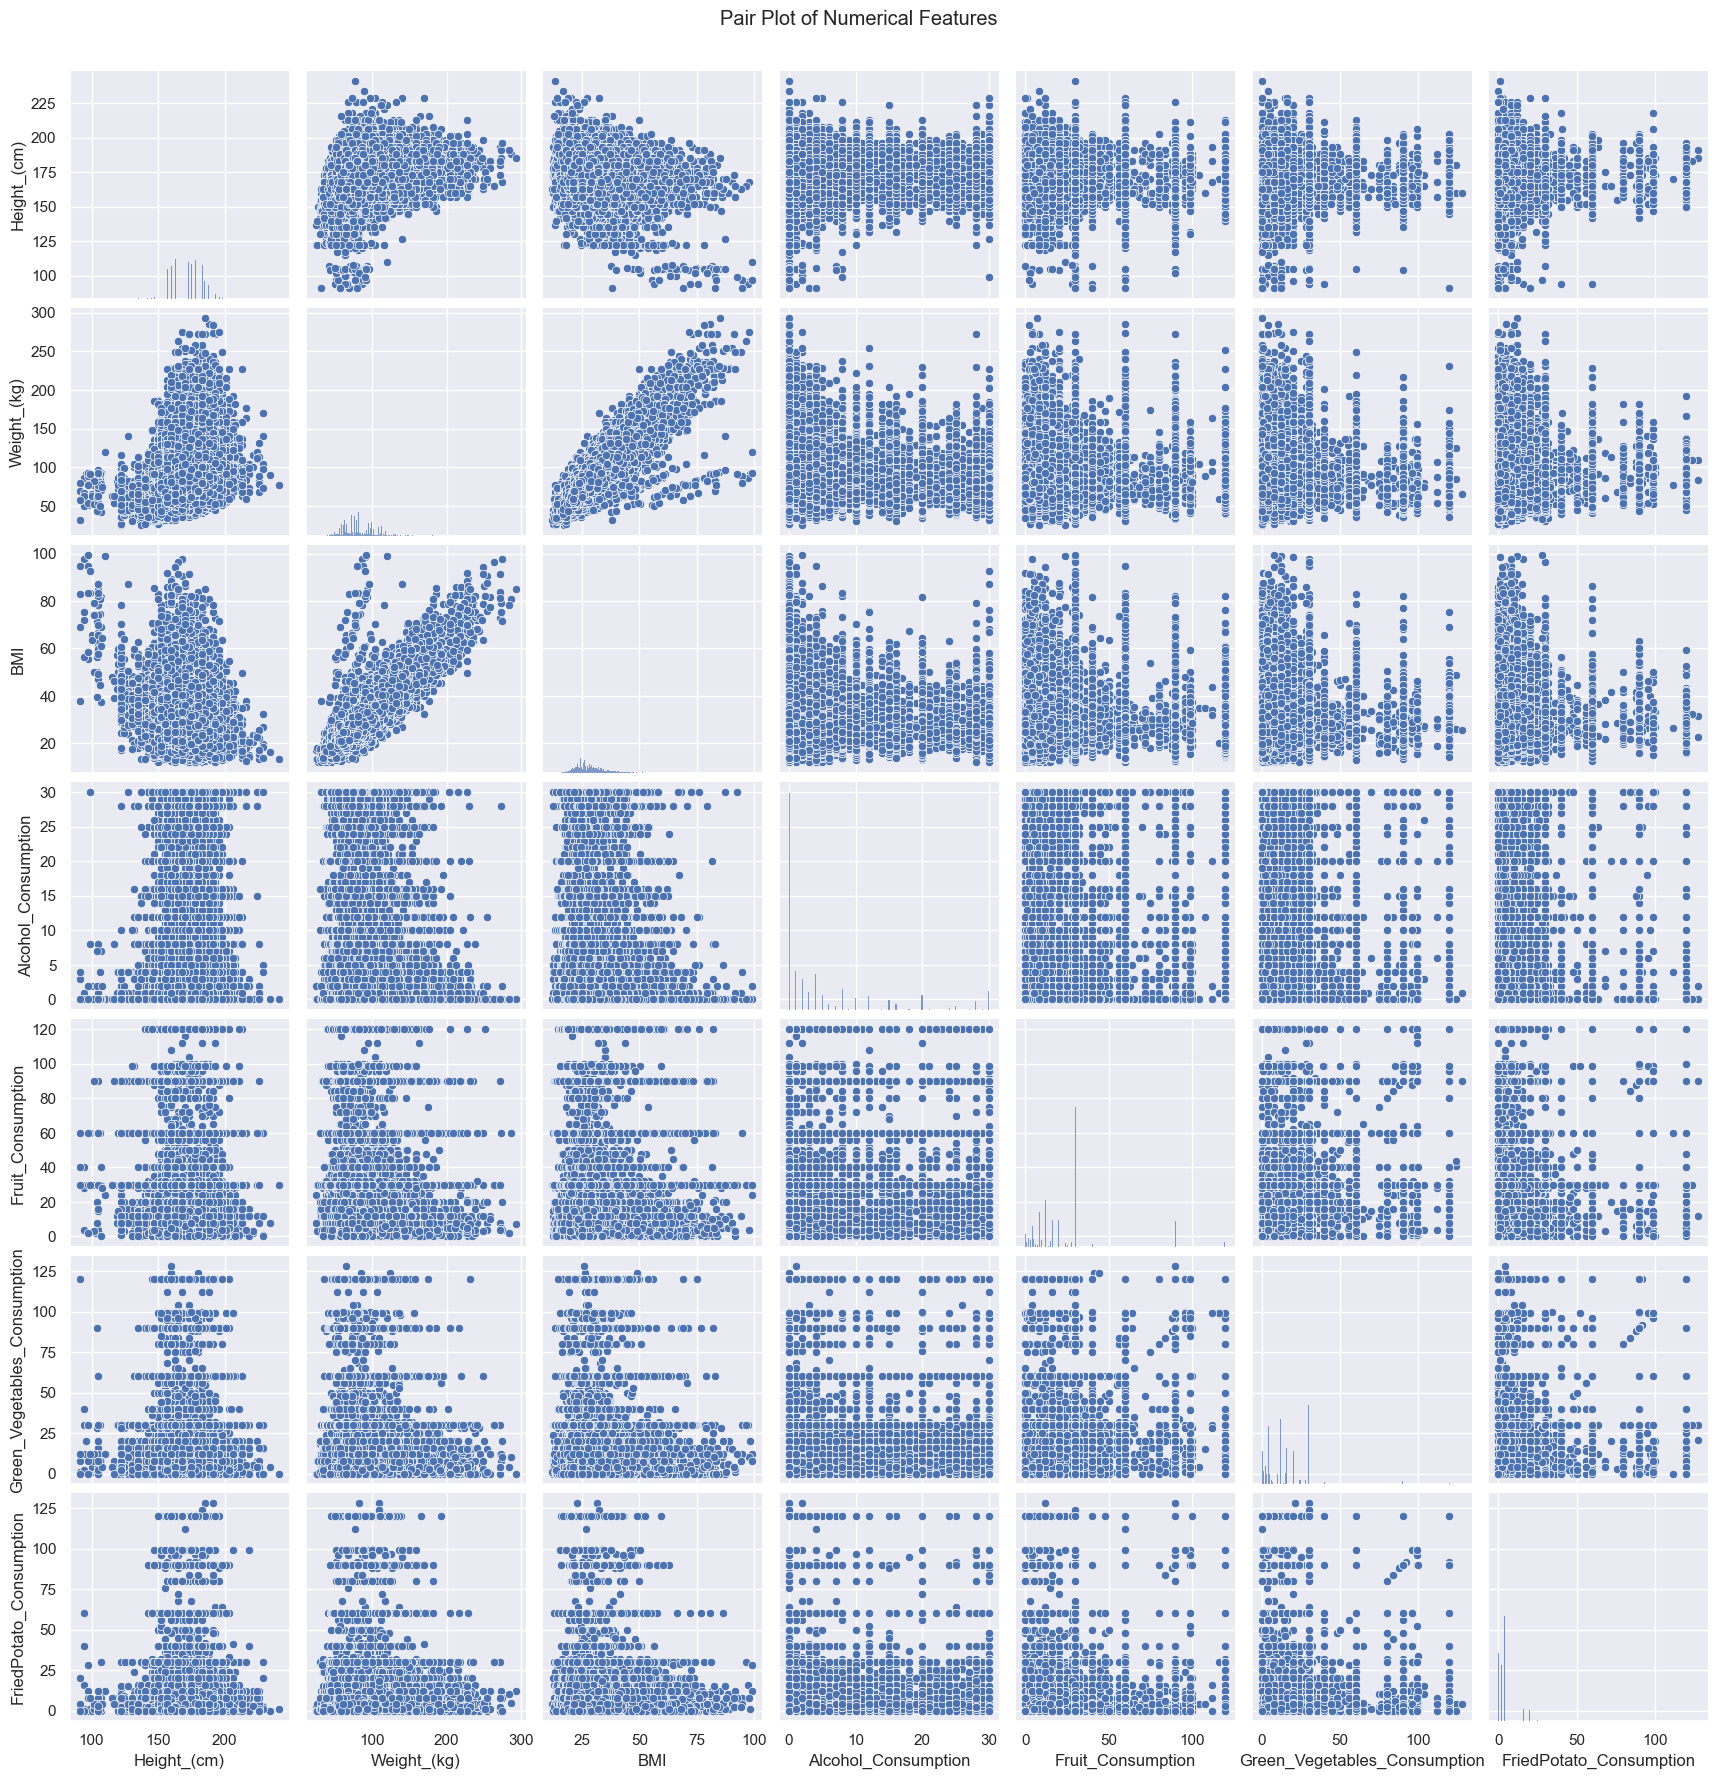

In [23]:
# Creating pair plot
sns.pairplot(dataset[numerical_features])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

In [24]:
# Select categorical columns for one-hot encoding
categorical_columns = ['General_Health', 'Checkup', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History']

In [25]:
# Use one-hot encoding
dataset_encoded = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)

In [26]:
# Display the first few rows of the encoded DataFrame
print(dataset_encoded.head())

   Heart_Disease Skin_Cancer Other_Cancer Depression Diabetes Arthritis  \
0              0          No           No         No       No       Yes   
1              1          No           No         No      Yes        No   
2              0          No           No         No      Yes        No   
3              1          No           No         No      Yes        No   
4              0          No           No         No       No        No   

   Height_(cm)  Weight_(kg)    BMI  Alcohol_Consumption  ...  \
0        150.0        32.66  14.54                  0.0  ...   
1        165.0        77.11  28.29                  0.0  ...   
2        163.0        88.45  33.47                  4.0  ...   
3        180.0        93.44  28.73                  0.0  ...   
4        191.0        88.45  24.37                  0.0  ...   

   Age_Category_40-44  Age_Category_45-49  Age_Category_50-54  \
0               False               False               False   
1               False             

In [27]:
X = dataset.drop('Heart_Disease', axis=1)  # Features (all columns except 'Heart_Disease')
y = dataset['Heart_Disease']  # Target variable

In [28]:
# Spliting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (247083, 18)
Shape of X_test: (61771, 18)
Shape of y_train: (247083,)
Shape of y_test: (61771,)


In [29]:
# Standardizing the features using StandardScaler
scaler = StandardScaler()

In [30]:
#features and target variable
# 'X' contains the features, and 'y' contains the target variable
X = dataset.drop('Heart_Disease', axis=1)  # Features (all columns except 'Heart_Disease')
y = dataset['Heart_Disease']  # Target variable

In [31]:
# Identifying categorical columns and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(exclude=['object']).columns

In [32]:
# Initializing OrdinalEncoder for categorical columns
encoder = OrdinalEncoder()

In [33]:
# Fit and transform the encoder on the features
X[categorical_columns] = encoder.fit_transform(X[categorical_columns])

In [34]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Standardizing the numerical features using StandardScaler
scaler = StandardScaler()

In [36]:
# Fit and transform the scaler on the training set
X_train_standardized = scaler.fit_transform(X_train[numerical_columns])

In [37]:
# Transforming the test set using the same scaler
X_test_standardized = scaler.transform(X_test[numerical_columns])

In [38]:
# Display the shapes of the resulting sets
print("Shape of X_train_standardized:", X_train_standardized.shape)
print("Shape of X_test_standardized:", X_test_standardized.shape)

Shape of X_train_standardized: (247083, 7)
Shape of X_test_standardized: (61771, 7)


In [39]:
# K-Nearest Neighbors (KNN)
k_value = 3 
knn_classifier = KNeighborsClassifier(n_neighbors=k_value)
knn_classifier.fit(X_train_standardized, y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
# selecting the corresponding features from X_test
X_test_adjusted = X_test[X_train.columns[:7]]

In [41]:
y_pred_knn = knn_classifier.predict(X_test_adjusted)

In [42]:
# Step 1: Checking the number of features in X_train_standardized and X_test
print("Number of features in X_train_standardized:", X_train_standardized.shape[1])
print("Number of features in X_test:", X_test.shape[1])

Number of features in X_train_standardized: 7
Number of features in X_test: 18


In [43]:
# Step 2: Adjust the test data to match the number of features in the training data
# Convert X_test to a NumPy array and select the first 7 features
X_test_adjusted = X_test.values[:, :7]

In [44]:
# Step 3: Make predictions using the adjusted test data
y_pred_knn = knn_classifier.predict(X_test_adjusted)

In [45]:
# Rest of the code for evaluation and plotting
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"\nK-Nearest Neighbors (KNN) Model Evaluation (k={k_value}):")
print(f"Accuracy: {accuracy_knn:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Model Evaluation (k=3):
Accuracy: 0.9179

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.12      0.00      0.00      4997

    accuracy                           0.92     61771
   macro avg       0.52      0.50      0.48     61771
weighted avg       0.85      0.92      0.88     61771



In [46]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

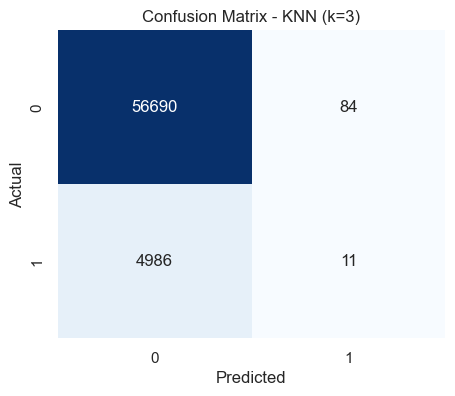

In [47]:
plot_confusion_matrix(y_test, y_pred_knn, title=f'Confusion Matrix - KNN (k={k_value})')

In [48]:
# Standardize the training features 
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)


In [49]:
# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_standardized, y_train)

DecisionTreeClassifier(random_state=42)

In [50]:
# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test_standardized)

In [51]:
# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nDecision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Model Evaluation:
Accuracy: 0.8606

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     56774
           1       0.19      0.22      0.21      4997

    accuracy                           0.86     61771
   macro avg       0.56      0.57      0.57     61771
weighted avg       0.87      0.86      0.87     61771



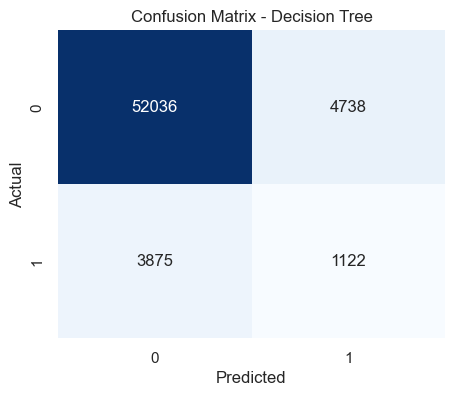

In [52]:
# Plot the confusion matrix for Decision Tree
plot_confusion_matrix(y_test, y_pred_dt, title='Confusion Matrix - Decision Tree')